In [3]:
#importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Reading dataset
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [7]:
df.shape

(119390, 32)

In [8]:
#Missing Values
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [20]:
#filling missing value with 0 and updating data frame
def data_clean(df):
    df.fillna(0,inplace=True)
    print(df.isnull().sum())

In [21]:
data_clean(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [22]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [23]:
list=['adults', 'children', 'babies']
for i in list:
    print('{} has uniqie values as {}'.format(i,df[i].unique()))

adults has uniqie values as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children has uniqie values as [ 0.  1.  2. 10.  3.]
babies has uniqie values as [ 0  1  2 10  9]


In [24]:
#creating a filter 
filter = (df['children']==0) & (df['adults']==0) & (df['babies']== 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [26]:
#negation for final cleaned data
data = df[~filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


## Prtoblem Statement
#### 1. Where Do the Guests come from?
#### 2. How Much do guest pay for a night?

In [65]:

#### 1. Where Do the Guests come from?


In [37]:
#before spatial analysis 
data[data['is_canceled']==0]['country'].value_counts().reset_index()

,index,country
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,BDI,1
163,BWA,1
164,PLW,1


In [38]:
country_wise_data = data[data['is_canceled']==0]['country'].value_counts().reset_index()

In [42]:
#REnaming coloumn name
country_wise_data.columns = ['Country','No of Guests']
country_wise_data # This is for 1

,Country,No of Guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,BDI,1
163,BWA,1
164,PLW,1


In [53]:
#####Now we need folium for a MAP
#!pip install folium

In [52]:
import folium
from folium.plugins import HeatMap

In [54]:
basemap = folium.Map()

In [55]:
#installing plotly
#!pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=c2de1fb090a749ca6abbcc37ca6fb7bd05cda648f77ab6abcb882c324ba61af9
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [58]:
import plotly.express as px

In [63]:
map_guest = px.choropleth(country_wise_data,
             locations = country_wise_data['Country'],
             color = country_wise_data['No of Guests'],
              hover_name = country_wise_data['Country'],
              title = 'Home Country of Guests'
             )
map_guest.show()

In [66]:
#### 2. How Much do guest pay for a night?


In [68]:
#new data processing
data2 = data[data['is_canceled']==0]

In [70]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

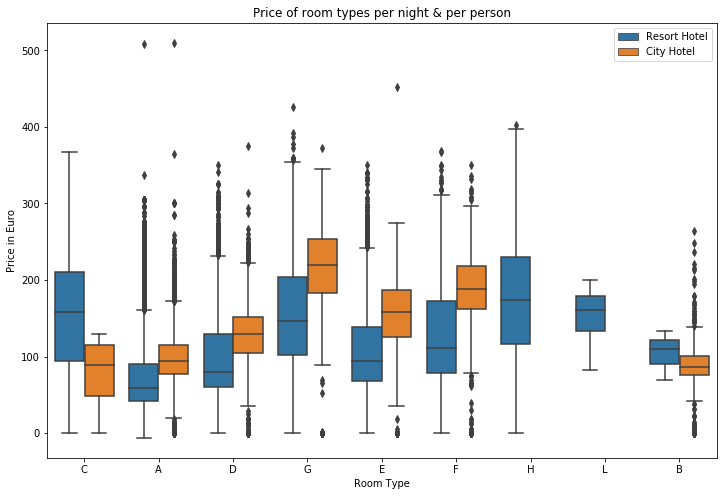

In [76]:
#Need price distribution
plt.figure(figsize = (12,8))
sns.boxplot(x='reserved_room_type',y='adr',hue='hotel',data=data2)
plt.title('Price of room types per night & per person')
plt.xlabel('Room Type')
plt.ylabel('Price in Euro')
plt.legend()
plt.show()